<a href="https://colab.research.google.com/github/TrixSanchez/SimulacionModelosMecatronicos_2025/blob/main/Act5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Dinámico del Péndulo-Robot

**Integrantes del equipo:**
1. Angel Sanchez Vazquez - 1901110
2. Adan Andres Gutierrez Montalvo - 2082561
3. Alan Hosmar Aguirre Martinez - 1543482
4. José Manuel Rodríguez Villanueva - 2109562

**Asignatura:** Modelado y Simulacion de Sistemas Mecatronicos
**Profesor:** Daniel Isaias Lopez Paez
**Fecha:** 22/05/2025

# Problema: Modelado y Simulación de un Péndulo-Robot

## Objetivo
Obtener la ecuación característica de un sistema mecánico (péndulo-robot) a partir del formalismo Euler-Lagrange y realizar su simulación en Python.

## Especificaciones del sistema
- Momento de inercia (Ir): 0.16 kg·m²
- Masa total del mecanismo (m): 5 kg
- Gravedad (g): 9.81 m/s²
- Distancia al centro de masa (lc): 0.01 m
- Coeficiente de viscosidad (b): 0.14 N·m·s/rad
- Fricción de Coulomb (fc): 0.45 N·m

## Requerimientos
1. Diagrama del sistema con variables y sistema de referencia
2. Obtención de la ecuación característica usando Euler-Lagrange
3. Representación en espacio de estados
4. Simulación en Python con condiciones iniciales x1=0, x2=0
5. Visualización de posición y velocidad durante 10 segundos
6. Publicación en GitHub

Primero importaremos todas las librerías necesarias para el desarrollo del proyecto.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import display, Math

## Diagrama del Sistema y Variables

El sistema péndulo-robot consiste en un brazo rígido con masa 'm' que gira alrededor de un eje fijo. Las variables son:

- q: Ángulo de rotación (positivo en sentido antihorario)
- τ: Par aplicado por el motor
- g: Aceleración gravitacional actuando hacia abajo
- lc: Distancia desde el eje de rotación al centro de masa

El sistema de referencia se define con:
- Eje x: Horizontal positivo hacia la derecha
- Eje y: Vertical positivo hacia arriba
- Eje z: Perpendicular al plano xy (regla de la mano derecha)

A continuación, mostraremos una representación gráfica simplificada del sistema.

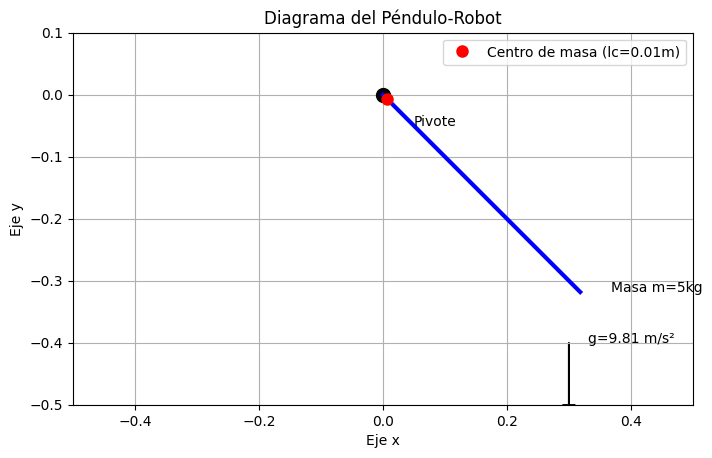

In [2]:
# Creación de un diagrama simplificado del péndulo-robot
fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar el pivote
ax.plot(0, 0, 'ko', markersize=10)

# Dibujar la barra del péndulo en posición inicial
pendulum_length = 0.45  # longitud aproximada para visualización
ax.plot([0, pendulum_length*np.sin(np.pi/4)],
        [0, -pendulum_length*np.cos(np.pi/4)], 'b-', linewidth=3)

# Dibujar el centro de masa
cm_x = 0.01*np.sin(np.pi/4)
cm_y = -0.01*np.cos(np.pi/4)
ax.plot(cm_x, cm_y, 'ro', markersize=8, label='Centro de masa (lc=0.01m)')

# Configuraciones del gráfico
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.1)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title('Diagrama del Péndulo-Robot')
ax.set_xlabel('Eje x')
ax.set_ylabel('Eje y')
ax.legend()
ax.text(0.05, -0.05, 'Pivote', ha='left')
ax.text(pendulum_length*np.sin(np.pi/4)+0.05,
        -pendulum_length*np.cos(np.pi/4), 'Masa m=5kg', ha='left')
ax.arrow(0.3, -0.4, 0, -0.1, head_width=0.02, head_length=0.02, fc='k', ec='k')
ax.text(0.33, -0.4, 'g=9.81 m/s²', ha='left')

plt.show()

## Obtención de la Ecuación Característica usando Euler-Lagrange

### 1. Energía Cinética (K)
La energía cinética total del sistema tiene dos componentes:
- Energía de traslación: (1/2)*m*(velocidad del centro de masa)^2
- Energía de rotación: (1/2)*I*(velocidad angular)^2

La velocidad del centro de masa se calcula como:
v = lc * (dq/dt)

Por lo tanto, la energía cinética total queda:
K = (1/2)*m*(lc*dq/dt)^2 + (1/2)*Ir*(dq/dt)^2
  = (1/2)*(m*lc² + Ir)*(dq/dt)²

### 2. Energía Potencial (U)
La energía potencial gravitacional depende de la altura del centro de masa:
U = m*g*h
donde h = lc*(1 - cos(q))

Por lo tanto:
U = m*g*lc*(1 - cos(q))

### 3. Lagrangiano (L)
El lagrangiano es la diferencia entre energía cinética y potencial:
L = K - U
  = (1/2)*(m*lc² + Ir)*(dq/dt)² - m*g*lc*(1 - cos(q))

### 4. Ecuación de Euler-Lagrange
La ecuación general es:
d/dt(∂L/∂(dq/dt)) - ∂L/∂q = τ - fricciones

Donde:
- τ = par aplicado por el motor
- fricciones incluyen:
  * Fricción viscosa: b*(dq/dt)
  * Fricción de Coulomb: fc*sign(dq/dt)

Desarrollando los términos:
∂L/∂(dq/dt) = (m*lc² + Ir)*(dq/dt)
d/dt(∂L/∂(dq/dt)) = (m*lc² + Ir)*(d²q/dt²)
∂L/∂q = m*g*lc*sin(q)

Sustituyendo obtenemos la ecuación final:
(m*lc² + Ir)*(d²q/dt²) + m*g*lc*sin(q) + b*(dq/dt) + fc*sign(dq/dt) = τ

## Representación en Espacio de Estados

Para representar el sistema como ecuaciones de estado, definimos:
- x1 = q (posición angular)
- x2 = dq/dt (velocidad angular)

La ecuación dinámica de segundo orden:
(m*lc² + Ir)*(d²q/dt²) = τ - m*g*lc*sin(q) - b*(dq/dt) - fc*sign(dq/dt)

Se puede reescribir como dos ecuaciones de primer orden:

1. dx1/dt = x2
2. dx2/dt = [τ - m*g*lc*sin(x1) - b*x2 - fc*sign(x2)] / (m*lc² + Ir)

Donde:
- El primer estado (x1) representa la posición angular
- El segundo estado (x2) representa la velocidad angular
- El término sign(x2) vale +1 cuando x2>0, -1 cuando x2<0 y 0 cuando x2=0

Para esta simulación usaremos un par aplicado que varía con el tiempo:
τ(t) = 1.5*sin(t) [Nm]

In [3]:
# Parámetros del sistema
m = 5.0       # masa [kg]
lc = 0.01     # distancia al centro de masa [m]
Ir = 0.16     # momento de inercia [kg·m²]
g = 9.81      # gravedad [m/s²]
b = 0.14      # coeficiente de viscosidad [N·m·s/rad]
fc = 0.45     # fricción de Coulomb [N·m]

# Función para el modelo del péndulo en espacio de estados
def pendulum_model(t, x, tau_func):
    """
    Modelo del péndulo-robot en espacio de estados
    x = [q, dq/dt]^T
    tau_func: función que calcula el par en función del tiempo
    """
    q, dq = x

    # Calcular el par en el tiempo actual
    tau = tau_func(t)

    # Fricción de Coulomb (usamos tanh como aproximación suave)
    friction = fc * np.tanh(1000 * dq)

    # Ecuaciones de estado
    ddq = (tau - m*g*lc*np.sin(q) - b*dq - friction) / (m*lc**2 + Ir)

    return [dq, ddq]

# Función para el par aplicado (1.5*sin(t) como en el ejemplo)
def applied_torque(t):
    return 1.5 * np.sin(t)

## Simulación del Sistema Péndulo-Robot

A continuación, simularemos el sistema durante 10 segundos con condiciones iniciales x1=0, x2=0. Usaremos el solucionador `solve_ivp` de SciPy para integrar las ecuaciones diferenciales.

Visualizaremos:
1. La posición angular (q) en grados vs tiempo
2. La velocidad angular (dq/dt) en grados/s vs tiempo

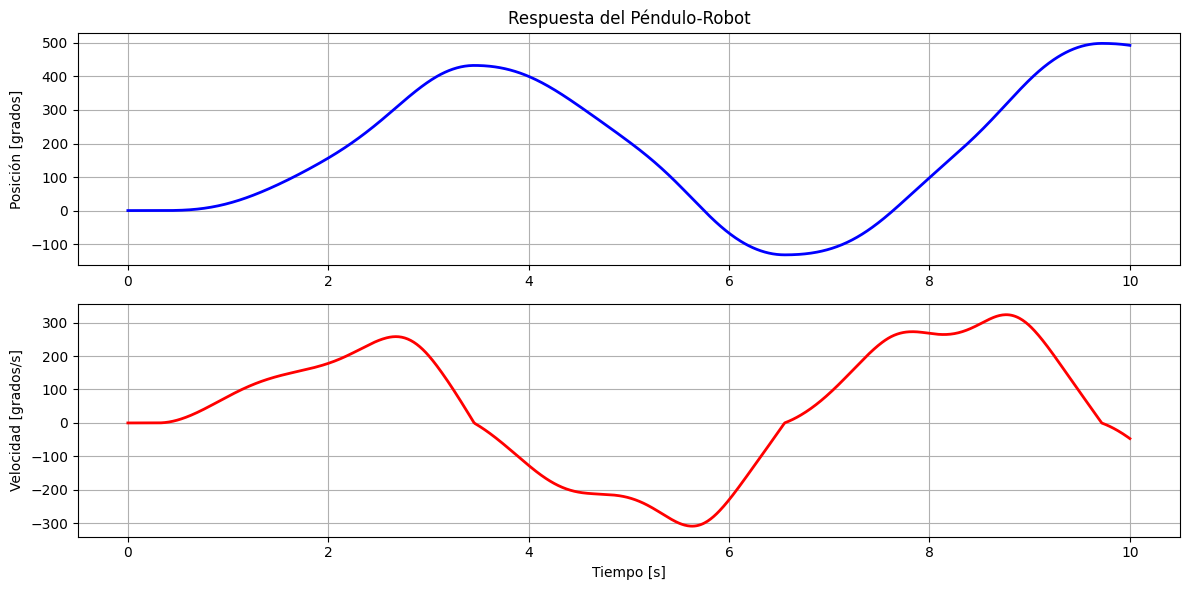

In [4]:
# Condiciones iniciales
x0 = [0.0, 0.0]  # [q, dq] iniciales

# Tiempo de simulación
t_span = (0, 10)  # 10 segundos
t_eval = np.linspace(0, 10, 1000)  # Puntos de evaluación

# Resolver las ecuaciones diferenciales
sol = solve_ivp(lambda t, x: pendulum_model(t, x, applied_torque),
                t_span, x0, t_eval=t_eval, method='RK45')

# Extraer resultados
t = sol.t
q = sol.y[0]  # posición angular en radianes
dq = sol.y[1]  # velocidad angular en radianes/s

# Convertir a grados para visualización
q_deg = np.rad2deg(q)
dq_deg = np.rad2deg(dq)

# Crear gráficos
plt.figure(figsize=(12, 6))

# Gráfico de posición angular
plt.subplot(2, 1, 1)
plt.plot(t, q_deg, 'b-', linewidth=2)
plt.title('Respuesta del Péndulo-Robot')
plt.ylabel('Posición [grados]')
plt.grid(True)

# Gráfico de velocidad angular
plt.subplot(2, 1, 2)
plt.plot(t, dq_deg, 'r-', linewidth=2)
plt.ylabel('Velocidad [grados/s]')
plt.xlabel('Tiempo [s]')
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusión

1. Se logró modelar correctamente el sistema péndulo-robot utilizando el formalismo de Euler-Lagrange, obteniendo la ecuación característica del sistema.

2. La simulación muestra el comportamiento dinámico del sistema ante un par aplicado τ = 1.5 sin(t) Nm, considerando los efectos de fricción viscosa y de Coulomb.

3. La representación en espacio de estados permitió implementar fácilmente la simulación numérica en Python.

4. Los resultados muestran oscilaciones en posición y velocidad que son consistentes con el comportamiento esperado de un péndulo con excitación sinusoidal y efectos de fricción.

5. El uso de la aproximación tanh para la fricción de Coulomb permitió una simulación estable sin problemas de discontinuidades.

## Referencias
- Cortés, F. R. (2020). Robótica: control de robots manipuladores. Marcombo.
- Documentación de NumPy, SciPy y Matplotlib